# VTAADT: Clustering
By Jordan Wilson, June/July 2023 for MSc dissertation

## Dependencies

### Install K-prototypes implementation

In [ ]:
!pip install --upgrade kmodes

### Import required libraries

In [ ]:
from kmodes.kprototypes import KPrototypes
import pandas as pd
import matplotlib.pyplot as plt

## Split up dataset by vehicle type

In [ ]:
# create AADT dataset for specific vehicle type prediction
# one of "cars_and_taxis", "buses_and_coaches", "lgvs", "all_hgvs", "two_wheeled_motor_vehicles"
AADT_COLS = ["cars_and_taxis", "two_wheeled_motor_vehicles", "lgvs", "all_hgvs", "buses_and_coaches"]
def vtaddt_dataset(df, vehicle_type):
  vtaddt = df[vehicle_type]
  df_sans_AADT = df.drop(AADT_COLS, axis=1)
  return pd.concat([df_sans_AADT, vtaddt], axis=1)

## Convert dataset dataframe to matrix
K-prototypes implementation requries a matrix, rather than a pandas dataframe

In [ ]:
def dataset_to_matrix(df, vehicle_type):
    if vehicle_type != "all":
      df = vtaddt_dataset(df, vehicle_type)

    cat_cols = list(df.select_dtypes(['object', 'boolean']).columns)
    cat_pos = [df.columns.get_loc(col) for col in cat_cols]

    matrix = df.to_numpy()
    return df, matrix, cat_pos

## Find and plot optimal K value, using the elbow method

In [ ]:
def optimal_k_elbow(df, cluster_num, vehicle_type):
    _, matrix, cat_pos = dataset_to_matrix(df, vehicle_type)

    # Choose optimal K using Elbow method
    cost = []
    for cluster in range(1, cluster_num + 1):
        try:
            kprototype = KPrototypes(n_jobs=-1, n_clusters=cluster, init='Huang', random_state=555)
            kprototype.fit_predict(matrix, categorical=cat_pos)
            cost.append(kprototype.cost_)
            print('{} clusters, {} cost'.format(cluster, kprototype.cost_))
        except Exception as e:
          print(e)
          break

    df_cost = pd.DataFrame({'Cluster': range(1, len(cost) + 1), 'Cost': cost})
    return df_cost

In [ ]:
def plot_elbow_method(df_cost):
    plt.figure(figsize=(8, 4.8))

    plt.plot(df_cost['Cluster'], df_cost['Cost'], marker='o', linestyle='-')

    for x, y, label in zip(df_cost['Cluster'], df_cost['Cost'], df_cost['Cluster']):
        plt.text(x, y, label, size=10, ha='center', va='bottom')

    plt.title('Optimal number of cluster with Elbow Method')
    plt.xlabel('Number of Clusters k')
    plt.ylabel('Cost')

    plt.show()

## Read in data from CSV

In [ ]:
df = pd.read_csv("3_buf_for_clustering.csv")

MISC_COLS = ["fid", "ROAD_CLASS", "latitude", "longitude"]
misc = df[MISC_COLS]
re_df = df.drop(["fid", "ROAD_CLASS", "latitude", "longitude"], axis=1)

## Elbow method results

### Cars

1 clusters, 5632.120319662666 cost
2 clusters, 4205.245343061925 cost
3 clusters, 3292.280155555358 cost
4 clusters, 2870.119620954769 cost
5 clusters, 2605.9470722327214 cost
6 clusters, 2444.4866700331445 cost
7 clusters, 2330.0364399785867 cost
8 clusters, 2230.646527584735 cost
9 clusters, 2146.201285723512 cost
10 clusters, 2087.757321097804 cost


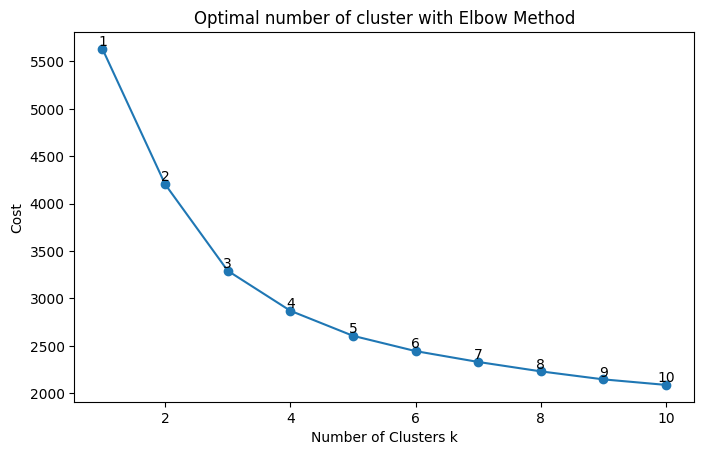

In [ ]:
plot_elbow_method(optimal_k_elbow(re_df, 10, "cars_and_taxis"))

### Buses

1 clusters, 4259.733954246191 cost
2 clusters, 3160.0199809475407 cost
3 clusters, 2635.8570867501644 cost
4 clusters, 2432.5583776281023 cost
5 clusters, 2271.281199032213 cost
6 clusters, 2152.2355780576 cost
7 clusters, 2056.9048635115614 cost
8 clusters, 1981.3753991913975 cost
9 clusters, 1941.3342350644907 cost
10 clusters, 1894.424761041596 cost


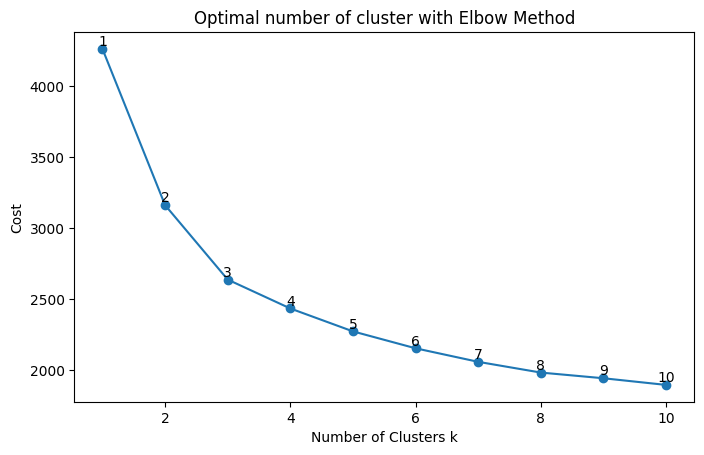

In [ ]:
plot_elbow_method(optimal_k_elbow(re_df, 10, "buses_and_coaches"))

### LGVs

1 clusters, 5429.773140508892 cost
2 clusters, 4110.011001427571 cost
3 clusters, 3178.4155660375295 cost
4 clusters, 2749.7442846507897 cost
5 clusters, 2498.6406649649884 cost
6 clusters, 2347.117259078143 cost
7 clusters, 2238.513518806364 cost
8 clusters, 2157.5418837767197 cost
9 clusters, 2086.005593355889 cost
10 clusters, 2014.428747267016 cost


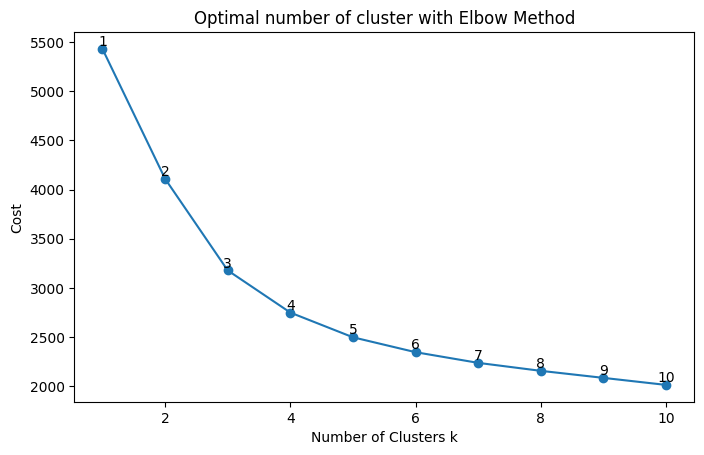

In [ ]:
plot_elbow_method(optimal_k_elbow(re_df, 10, "lgvs"))

### HGVs

1 clusters, 5416.111173521396 cost
2 clusters, 4048.6777890829235 cost
3 clusters, 3113.927862009134 cost
4 clusters, 2679.749098370685 cost
5 clusters, 2390.5800988752826 cost
6 clusters, 2238.1594042840557 cost
7 clusters, 2151.17349769658 cost
8 clusters, 2066.340179848787 cost
9 clusters, 1998.384191373387 cost
10 clusters, 1932.5053224013775 cost


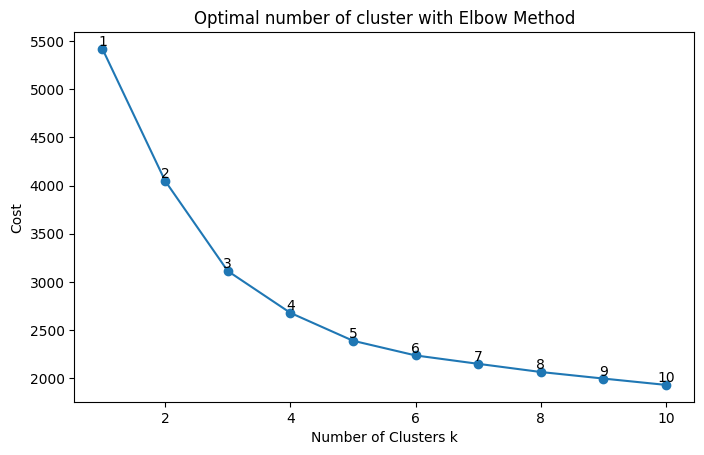

In [ ]:
plot_elbow_method(optimal_k_elbow(re_df, 10, "all_hgvs"))

### Motorcycles

1 clusters, 5057.355983802725 cost
2 clusters, 3979.4034958090533 cost
3 clusters, 3197.2470306347445 cost
4 clusters, 2784.142668887229 cost
5 clusters, 2568.8122855761076 cost
6 clusters, 2410.4313731406987 cost
7 clusters, 2311.892381696252 cost
8 clusters, 2222.8036574315124 cost
9 clusters, 2154.212279278801 cost
10 clusters, 2097.032555261989 cost


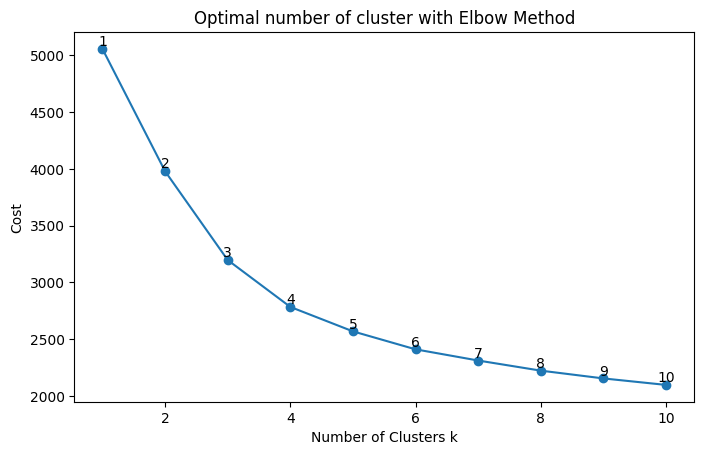

In [ ]:
plot_elbow_method(optimal_k_elbow(re_df, 10, "two_wheeled_motor_vehicles"))

## Routines to perform the clustering

In [ ]:
def fit_kprototype(df, vehicle_type, cluster_num):
  print("Fitting {} clusters for {}".format(cluster_num, vehicle_type))
  df, matrix, cat_pos = dataset_to_matrix(df, vehicle_type)
  kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster_num, init = 'Huang', random_state = 555)
  kprototype.fit_predict(matrix, categorical = cat_pos)
  return df, kprototype

In [ ]:
def label_clusters(df, misc, kpt):
  # rejoin main dataframe with misc (data not used for clustering)
  df = pd.concat([misc, df], axis=1)
  df['Cluster Labels'] = kpt.labels_
  return df

In [ ]:
def cluster_averages(df, clusters, vehicle_type):
  df_c = df.copy(deep=True)
  df_c["Total"] = df_c["Cluster Labels"]
  df_c[vehicle_type + "_min"] = df_c[vehicle_type]
  df_c[vehicle_type + "_max"] = df_c[vehicle_type]
  return df_c.groupby('Cluster Labels').agg(
      {
          'Total':'count',
          vehicle_type: 'mean',
          vehicle_type + "_min": 'min',
          vehicle_type + "_max": 'max',
          'ROAD_CLASS': lambda x: x.value_counts().index[0],
          "POP_DEN_People.per.Sq.Km": 'mean',
          "MAJOR_URBAN_AREA": lambda x: x.value_counts().index[0],
          "URBAN_AREA": lambda x: x.value_counts().index[0],
          "DIST_URBAN": 'mean',
          "DIST_MAJOR_URBAN": 'mean',
          "DIST_CENTROID_URBAN": 'mean',
          "DIST_CENTROID_MAJOR_URBAN": 'mean',
      }
    ).reset_index()

## Clustering results

### Cars

In [ ]:
cars_df, cars_kpt = fit_kprototype(re_df, "cars_and_taxis", 5)

Fitting 5 clusters for cars_and_taxis


In [ ]:
cars_df_labelled = label_clusters(cars_df, misc, cars_kpt)

In [ ]:
cars_df_labelled.to_csv("cars_and_taxis_labelled.csv", encoding='utf-8', index=False)

In [ ]:
cluster_averages(cars_df_labelled, cars_kpt, "cars_and_taxis")

Cluster Labels  Total  cars_and_taxis  cars_and_taxis_min  \
0               0    127        4.264136            2.871698   
1               1    453        1.760778            1.000000   
2               2     41        2.537262            1.054473   
3               3    260        2.031853            1.004171   
4               4     37        7.458069            5.773835   

   cars_and_taxis_max ROAD_CLASS  POP_DEN_People.per.Sq.Km  MAJOR_URBAN_AREA  \
0            5.960686          A                  0.074505             False   
1            3.092778          A                  0.057839             False   
2            6.041904          A                  0.311773              True   
3            3.534938          A                  0.203239              True   
4           10.000000          A                  0.097700             False   

   URBAN_AREA  DIST_URBAN  DIST_MAJOR_URBAN  DIST_CENTROID_URBAN  \
0       False    0.012808          0.035957             0.102223   
1       False    0.050872          0.172875             0.121525   
2        True    0.000432          0.000033             0.169195   
3        True    0.000549          0.010286             0.107667   
4       False    0.004334          0.004539             0.139450   

   DIST_CENTROID_MAJOR_URBAN  
0                   0.072741  
1                   0.206571  
2                   0.022485  
3                   0.033236  
4                   0.038085

### Buses

In [ ]:
bus_df, bus_kpt = fit_kprototype(re_df, "buses_and_coaches", 5)
bus_df_labelled = label_clusters(bus_df, misc, bus_kpt)
bus_df_labelled.to_csv("buses_and_coaches_labelled.csv", encoding='utf-8', index=False)

Fitting 5 clusters for buses_and_coaches


In [ ]:
cluster_averages(bus_df_labelled, bus_kpt, "buses_and_coaches")

Cluster Labels  Total  buses_and_coaches  buses_and_coaches_min  \
0               0     29           2.393631               1.000000   
1               1     12           6.549718               4.737767   
2               2    204           1.898821               1.000000   
3               3    320           1.268264               1.000000   
4               4    353           1.506860               1.000000   

   buses_and_coaches_max ROAD_CLASS  POP_DEN_People.per.Sq.Km  \
0               5.178168          A                  0.323011   
1              10.000000          A                  0.260393   
2               4.297365          A                  0.194668   
3               2.191343          A                  0.031458   
4               3.066499          A                  0.120772   

   MAJOR_URBAN_AREA  URBAN_AREA  DIST_URBAN  DIST_MAJOR_URBAN  \
0              True        True    0.000024          0.000027   
1              True        True    0.001356          0.000046   
2              True        True    0.000390          0.004671   
3             False       False    0.074303          0.188062   
4             False        True    0.003170          0.069656   

   DIST_CENTROID_URBAN  DIST_CENTROID_MAJOR_URBAN  
0             0.171651                   0.022831  
1             0.126863                   0.015962  
2             0.115097                   0.026961  
3             0.144518                   0.222176  
4             0.090362                   0.102938

### LGVs

In [ ]:
lgvs_df, lgvs_kpt = fit_kprototype(re_df, "lgvs", 5)
lgvs_df_labelled = label_clusters(lgvs_df, misc, lgvs_kpt)
lgvs_df_labelled.to_csv("lgvs_labelled.csv", encoding='utf-8', index=False)

Fitting 5 clusters for lgvs


In [ ]:
cluster_averages(lgvs_df_labelled, lgvs_kpt, "lgvs")

Cluster Labels  Total      lgvs  lgvs_min   lgvs_max ROAD_CLASS  \
0               0    256  1.700715  1.007610   3.337392          A   
1               1     37  2.104406  1.023846   4.944698          A   
2               2     45  6.895079  5.344495  10.000000          A   
3               3    119  3.768462  2.552004   5.364789          A   
4               4    461  1.574779  1.000000   2.816337          A   

   POP_DEN_People.per.Sq.Km  MAJOR_URBAN_AREA  URBAN_AREA  DIST_URBAN  \
0                  0.208059              True        True    0.000335   
1                  0.317597              True        True    0.000479   
2                  0.080544             False       False    0.016422   
3                  0.068916             False       False    0.013368   
4                  0.060875             False       False    0.048935   

   DIST_MAJOR_URBAN  DIST_CENTROID_URBAN  DIST_CENTROID_MAJOR_URBAN  
0          0.009370             0.106577                   0.031817  
1          0.000036             0.174811                   0.023358  
2          0.016381             0.132608                   0.049861  
3          0.041424             0.102367                   0.078437  
4          0.168451             0.121958                   0.202169

### HGVs

In [ ]:
all_hgvs_df, all_hgvs_kpt = fit_kprototype(re_df, "all_hgvs", 5)
all_hgvs_df_labelled = label_clusters(all_hgvs_df, misc, all_hgvs_kpt)
all_hgvs_df_labelled.to_csv("all_hgvs_labelled.csv", encoding='utf-8', index=False)

Fitting 5 clusters for all_hgvs


In [ ]:
cluster_averages(all_hgvs_df_labelled, all_hgvs_kpt, "all_hgvs")

Cluster Labels  Total  all_hgvs  all_hgvs_min  all_hgvs_max ROAD_CLASS  \
0               0    118  3.212923      2.187108      4.762757          A   
1               1    439  1.260140      1.000000      2.262310          A   
2               2     36  1.381491      1.001343      2.415398          A   
3               3     51  6.602112      4.749329     10.000000          A   
4               4    274  1.311480      1.000000      2.841092          A   

   POP_DEN_People.per.Sq.Km  MAJOR_URBAN_AREA  URBAN_AREA  DIST_URBAN  \
0                  0.050987             False       False    0.037095   
1                  0.065285             False       False    0.043957   
2                  0.317656              True        True    0.000492   
3                  0.070232             False       False    0.023744   
4                  0.201494              True        True    0.000326   

   DIST_MAJOR_URBAN  DIST_CENTROID_URBAN  DIST_CENTROID_MAJOR_URBAN  
0          0.138113             0.121842                   0.172465  
1          0.148875             0.116094                   0.183442  
2          0.000037             0.174879                   0.023385  
3          0.027261             0.139203                   0.062323  
4          0.009771             0.107248                   0.032427

### Motorcycles

In [ ]:
two_wheel_df, two_wheel_kpt = fit_kprototype(re_df, "two_wheeled_motor_vehicles", 5)
two_wheel_df_labelled = label_clusters(two_wheel_df, misc, two_wheel_kpt)
two_wheel_df_labelled.to_csv("two_wheeled_motor_vehicles_labelled.csv", encoding='utf-8', index=False)

Fitting 5 clusters for two_wheeled_motor_vehicles


In [ ]:
cluster_averages(two_wheel_df_labelled, two_wheel_kpt, "two_wheeled_motor_vehicles")

Cluster Labels  Total  two_wheeled_motor_vehicles  \
0               0     36                    2.478261   
1               1    439                    1.665440   
2               2     43                    6.295349   
3               3    141                    3.409574   
4               4    259                    1.841531   

   two_wheeled_motor_vehicles_min  two_wheeled_motor_vehicles_max ROAD_CLASS  \
0                        1.000000                        5.754348          A   
1                        1.000000                        2.800000          A   
2                        4.560870                       10.000000          A   
3                        2.408696                        5.030435          A   
4                        1.000000                        3.660870          A   

   POP_DEN_People.per.Sq.Km  MAJOR_URBAN_AREA  URBAN_AREA  DIST_URBAN  \
0                  0.322337              True        True    0.000019   
1                  0.056481             False       False    0.050364   
2                  0.099691             False       False    0.003747   
3                  0.081888             False       False    0.018568   
4                  0.203364              True        True    0.000396   

   DIST_MAJOR_URBAN  DIST_CENTROID_URBAN  DIST_CENTROID_MAJOR_URBAN  
0          0.000022             0.171456                   0.022844  
1          0.171168             0.118819                   0.205230  
2          0.011599             0.133033                   0.045681  
3          0.056219             0.112344                   0.091035  
4          0.008314             0.108990                   0.031153